# Physical Data Preprocessing (C-Town)

### BATADAL Features
##### - Tanks: levels (m)
##### - Pumps: flows (L/S), statuses (on/off)
##### - Valves: flows (L/S),  statuses (on/off)
##### - Joints: Pressures after and before valves/pumps (eqaul to suction head (m), discharge head (m) for pump stations)

### Current Data: C-Town attack-free data (9 weeks with exceptions)

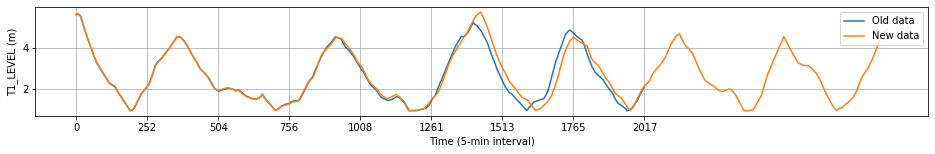

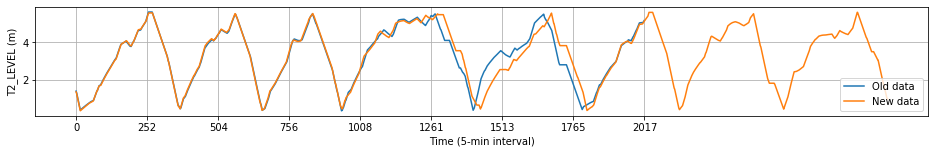

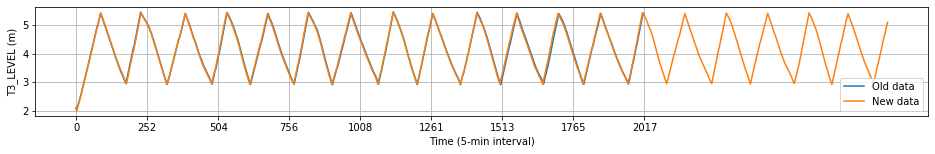

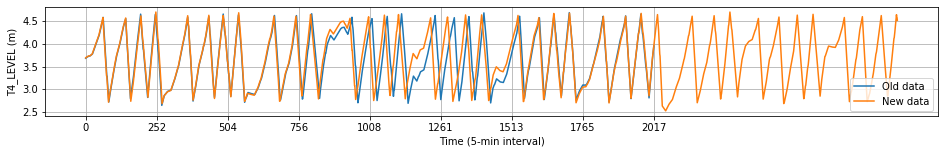

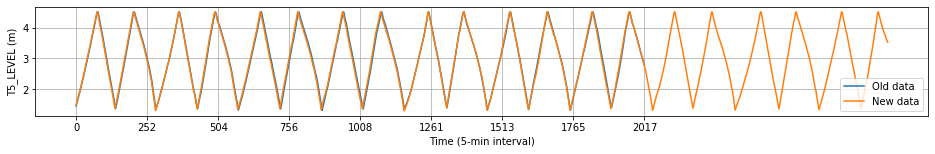

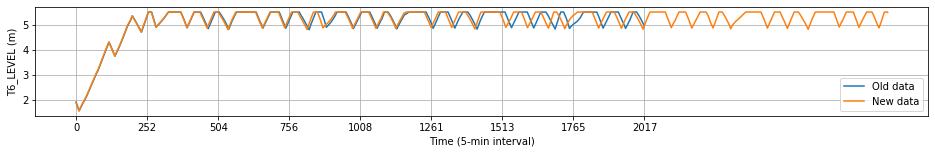

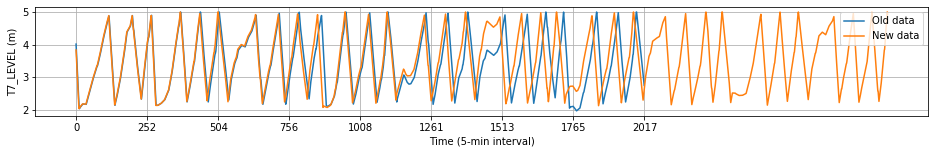

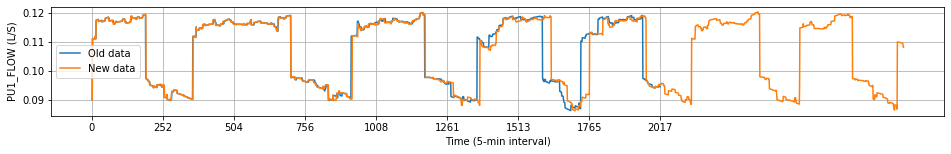

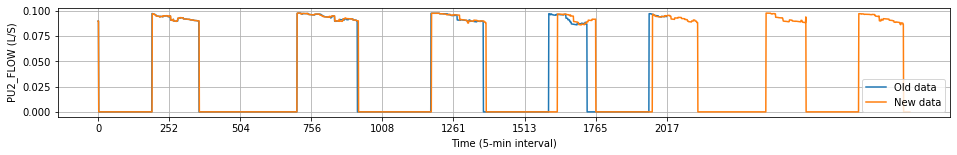

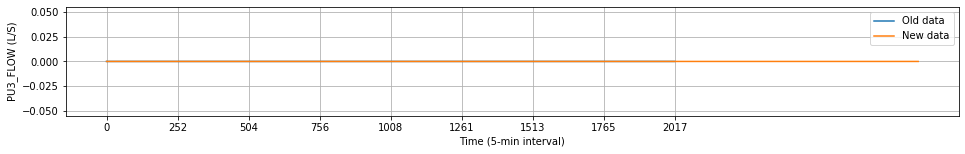

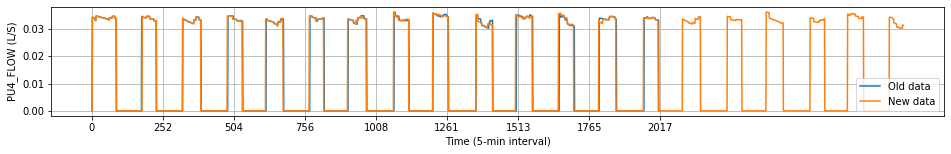

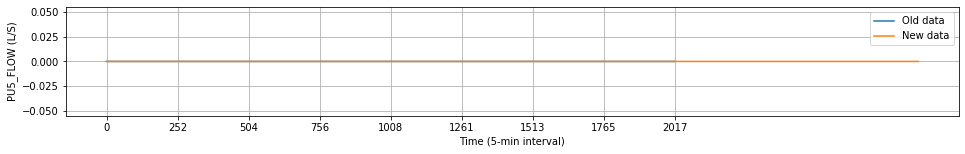

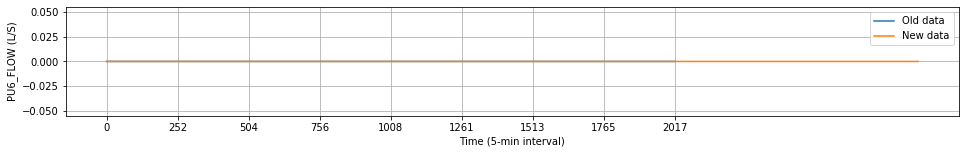

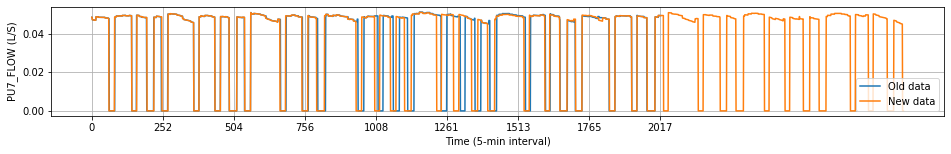

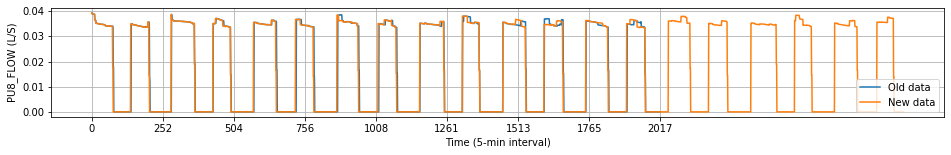

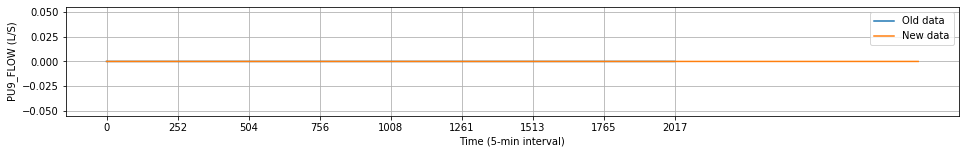

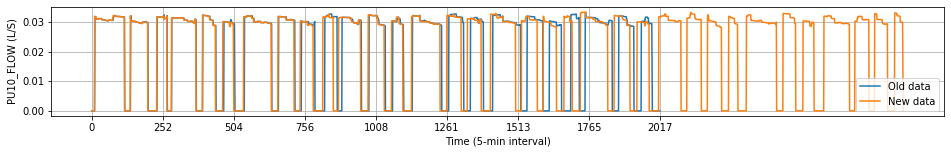

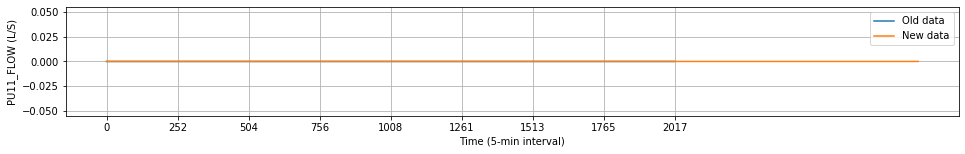

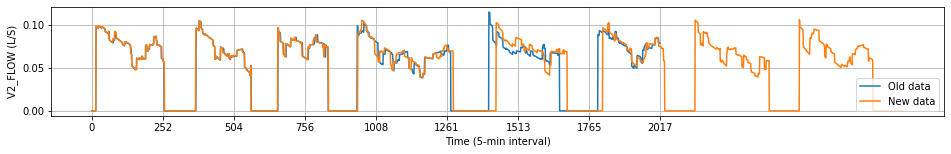

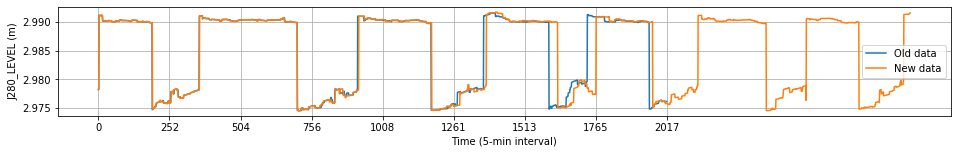

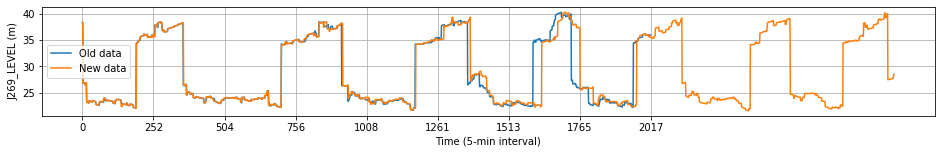

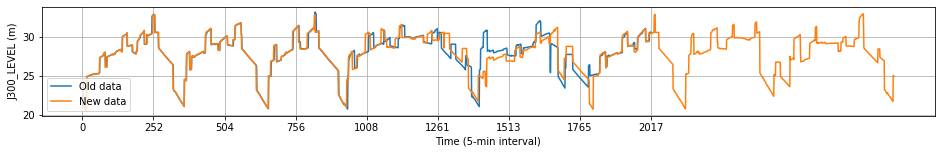

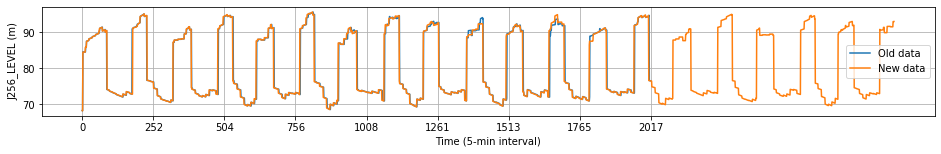

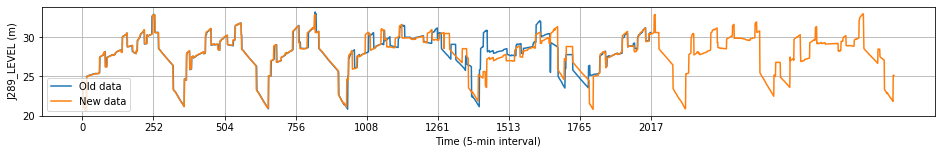

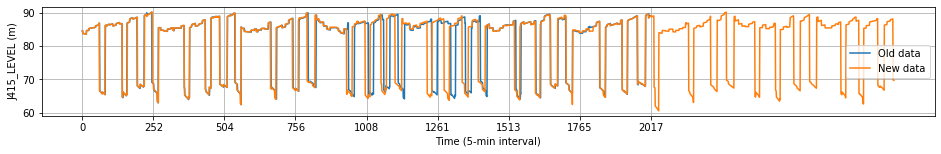

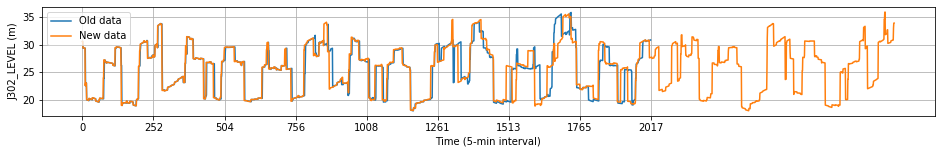

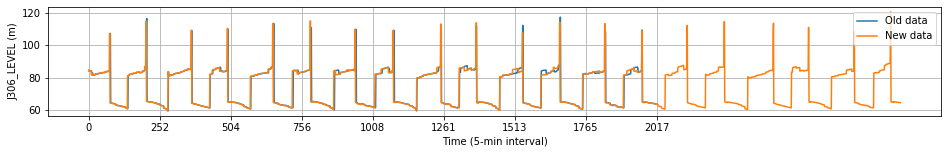

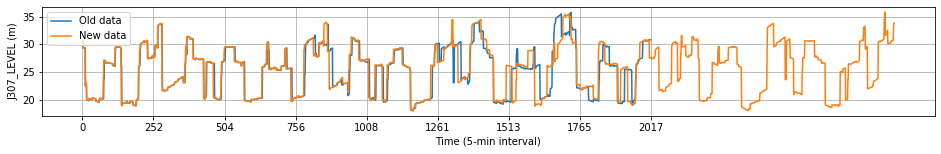

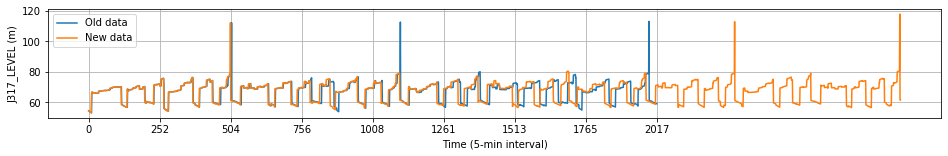

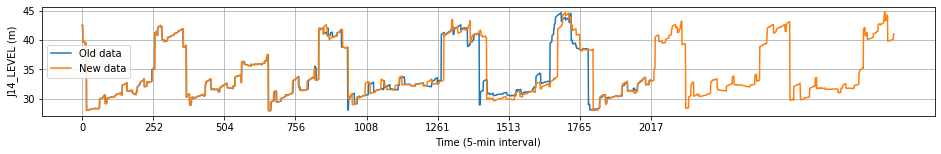

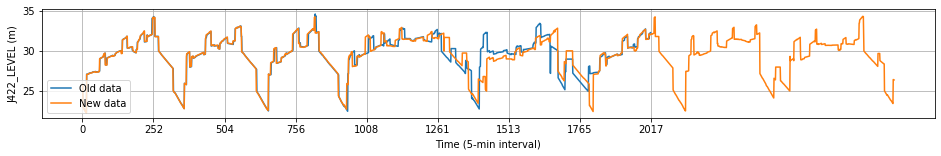

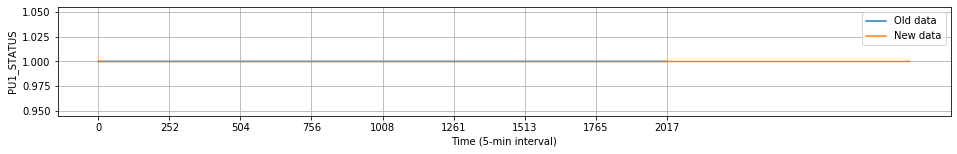

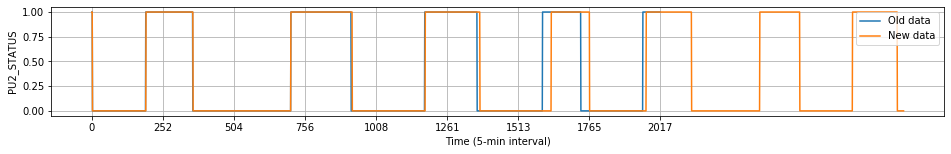

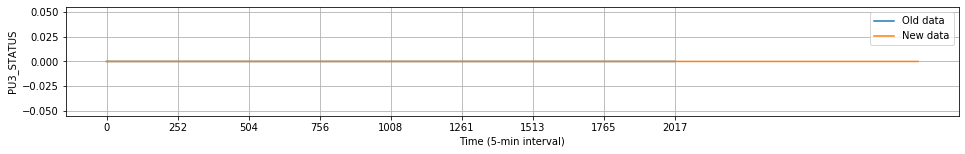

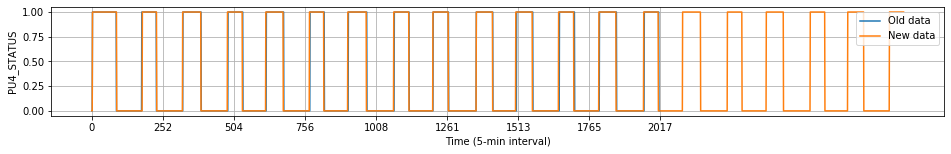

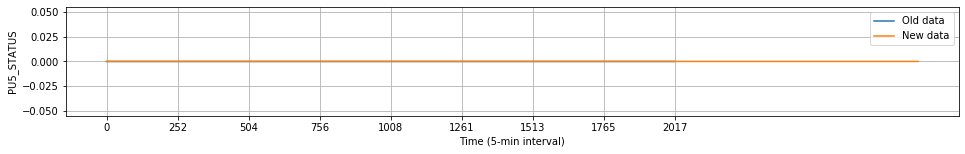

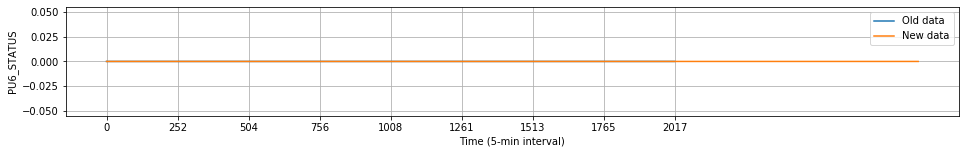

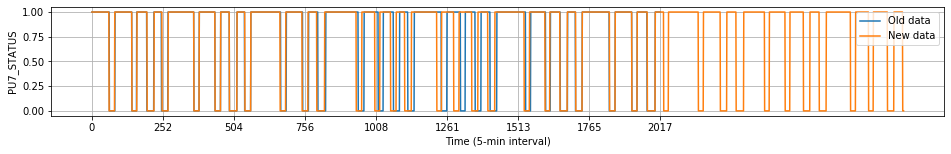

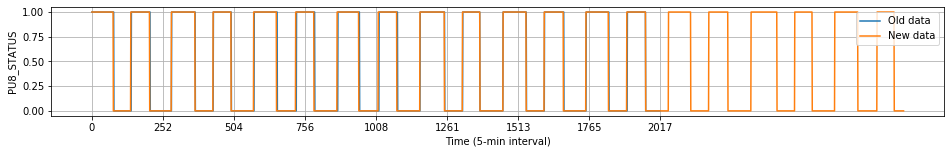

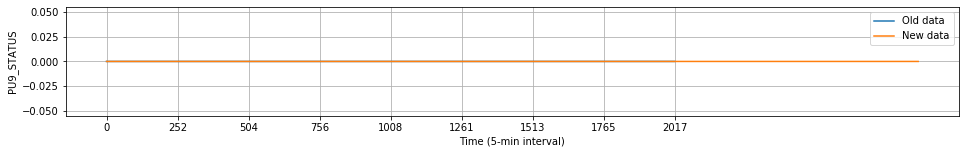

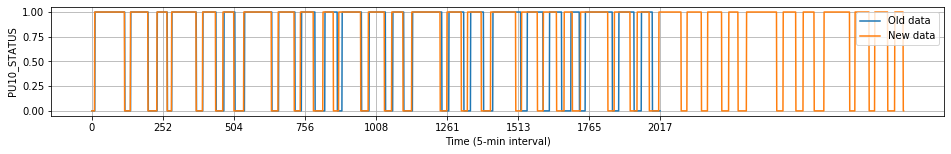

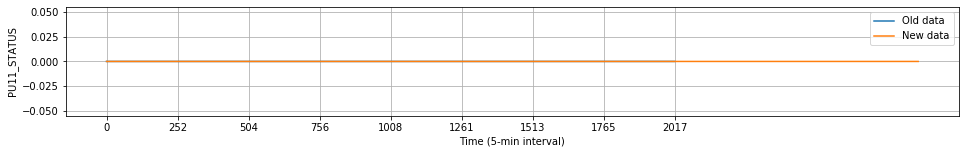

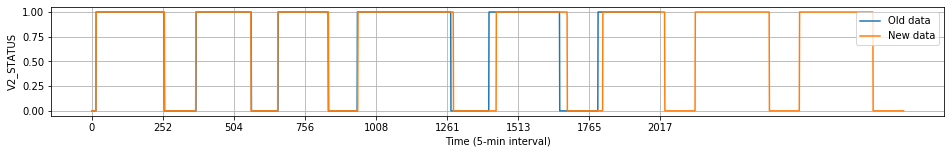

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import fileinput

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'   
    
path_in = 'data/'

# Data frame creation                
data_old = pd.read_csv('data/old_week_0/week_0/physical_process.csv')    
data_new = pd.read_csv('data/week_0/physical_process.csv')    

#////////////////////////////// label, cat/non-cat variable definition     ///////////////////////////////

var_all = list(data_old.head(0))
var_noncat = ['T1_LEVEL', 'T2_LEVEL', 'T3_LEVEL', 'T4_LEVEL', 'T5_LEVEL', 'T6_LEVEL', 'T7_LEVEL', 
               'PU1_FLOW', 'PU2_FLOW', 'PU3_FLOW', 'PU4_FLOW', 'PU5_FLOW', 'PU6_FLOW', 'PU7_FLOW',
               'PU8_FLOW', 'PU9_FLOW', 'PU10_FLOW', 'PU11_FLOW', 
               'V2_FLOW', 
               'J280_LEVEL', 'J269_LEVEL', 'J300_LEVEL', 'J256_LEVEL', 'J289_LEVEL', 'J415_LEVEL', 
               'J302_LEVEL', 'J306_LEVEL', 'J307_LEVEL', 'J317_LEVEL', 'J14_LEVEL', 'J422_LEVEL']      
    
var_cat =['PU1_STATUS', 'PU2_STATUS', 'PU3_STATUS', 'PU4_STATUS', 'PU5_STATUS', 'PU6_STATUS', 'PU7_STATUS', 'PU8_STATUS',
          'PU9_STATUS','PU10_STATUS', 'PU11_STATUS',
          'V2_STATUS'] 

var_cat_noncat = var_noncat + var_cat

label = ['Attack#01', 'Attack#02']


tanks = ['T1_LEVEL', 'T2_LEVEL', 'T3_LEVEL', 'T4_LEVEL', 'T5_LEVEL', 'T6_LEVEL', 'T7_LEVEL']

joints = ['J280_LEVEL', 'J269_LEVEL', 'J300_LEVEL', 'J256_LEVEL', 'J289_LEVEL', 'J415_LEVEL',
          'J302_LEVEL', 'J306_LEVEL', 'J307_LEVEL', 'J317_LEVEL', 'J14_LEVEL', 'J422_LEVEL']

flows = ['PU1_FLOW', 'PU2_FLOW', 'PU3_FLOW', 'PU4_FLOW', 'PU5_FLOW', 'PU6_FLOW', 
         'PU7_FLOW', 'PU8_FLOW', 'PU9_FLOW', 'PU10_FLOW', 'PU11_FLOW',
         'V2_FLOW']

xlabel_weeks = np.linspace(0, len(data_old), sim_weeks)
    
for var in (var_cat_noncat):
    plt.figure(figsize=(16, 2))    
    plt.plot(data_old[var], label="Old data")
    plt.plot(data_new[var], label="New data")
    plt.legend()
    plt.grid(True)
    
    if var in tanks:
        plt.ylabel(var + ' (m)')
    elif var in joints:
        plt.ylabel(var + ' (m)')
    elif var in flows:
        plt.ylabel(var + ' (L/S)')
    else:
        plt.ylabel(var)
        
    #plt.ylim (0,7)
    #plt.xlim(3800, 4200)
    plt.xlabel('Time (5-min interval)')
    plt.xticks(xlabel_weeks), #plt.xlabel(label_x)
    plt.show()

#///////////////////////////////////////////   One-hot encoding  ///////////////////////////////////////////
        

# Spikes @ J317

  
 J317-PU10 Relation 
  
 J317 Spike @ 507 


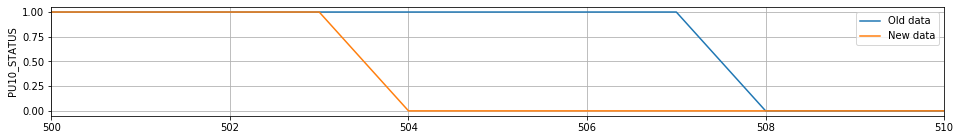

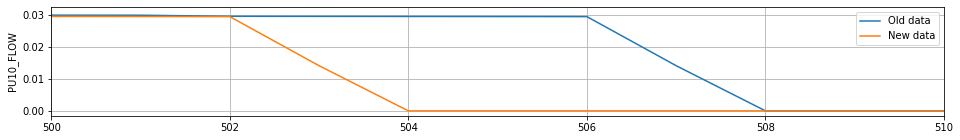

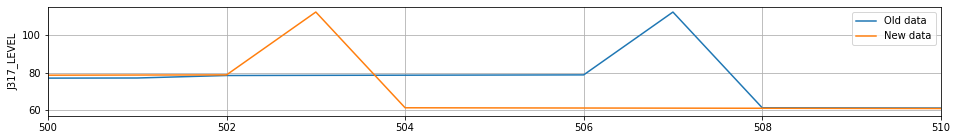

  
 J317 Spike @ 1106 


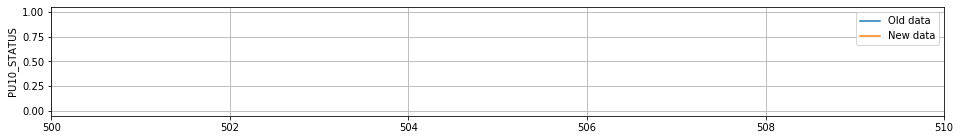

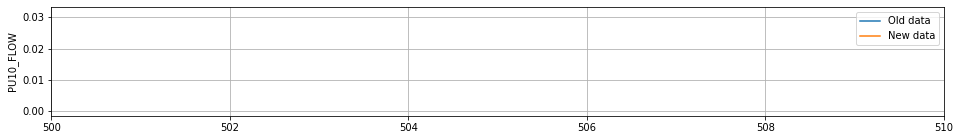

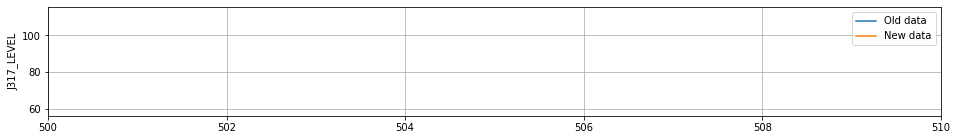

In [22]:
print(color.PURPLE, color.BOLD + "" , color.END)
print(color.PURPLE, color.BOLD + 'J317-PU10 Relation' , color.END)

x = 'PU10_FLOW'
y = 'J317_LEVEL'

select_var = ['PU10_STATUS', 'PU10_FLOW', 'J317_LEVEL'] #'J306_LEVEL',
spikes_old = list(data_old[data_old.J317_LEVEL > 85].index)
spikes_new = list(data_new[data_new.J317_LEVEL > 85].index)

for sp in spikes_old[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'J317 Spike @ ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data_old.loc[sp-20:sp+20,[var]], label="Old data")
        plt.plot(data_new.loc[sp-20:sp+20,[var]], label="New data")
        plt.xlim(left=500, right=510)
        plt.legend()
        plt.grid(True)
        plt.ylabel(var)
        plt.show()

# Spikes @ J306

  
 J306-PU8 Relation 


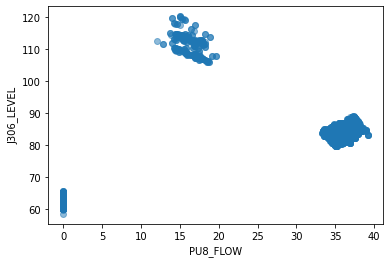

  
 J317 Spike @ 143 


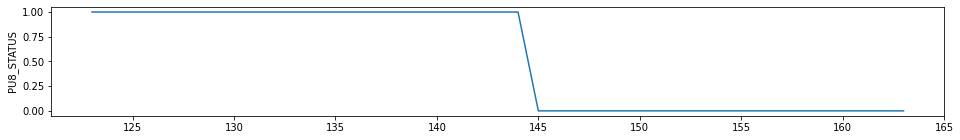

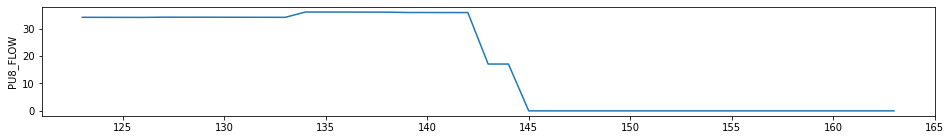

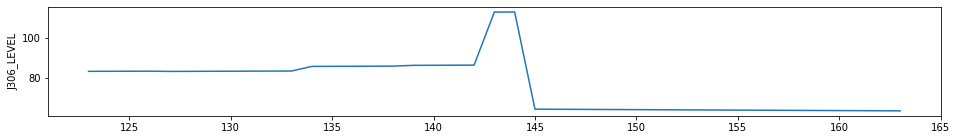

  
 J317 Spike @ 144 


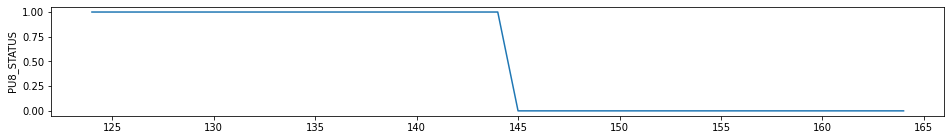

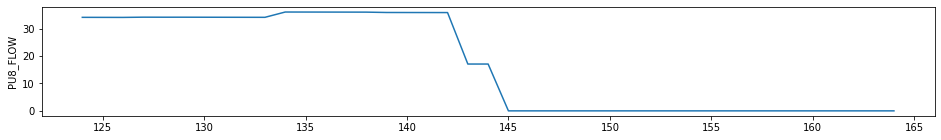

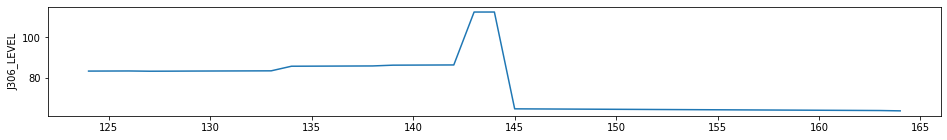

In [20]:
print(color.PURPLE, color.BOLD + "" , color.END)
print(color.PURPLE, color.BOLD + 'J306-PU8 Relation', color.END)

x = 'PU8_FLOW'
y = 'J306_LEVEL'
plt.scatter(data[x], data[y], alpha=0.5)
plt.xlabel(x)
plt.ylabel(y)
plt.show()

select_var = ['PU8_STATUS', 'PU8_FLOW', 'J306_LEVEL'] #'J306_LEVEL',
spikes = list(data[data.J306_LEVEL > 100].index)

for sp in spikes[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'J317 Spike @ ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data.loc[sp-20:sp+20,[var]])
        plt.ylabel(var)
        plt.show()

# Pump 10's 1 upstream + 3 downstream nodes

  
 Upstream Joint: J307, Dowstream joints: J317, J384, J23 
  
 Spike @ Sample 330 


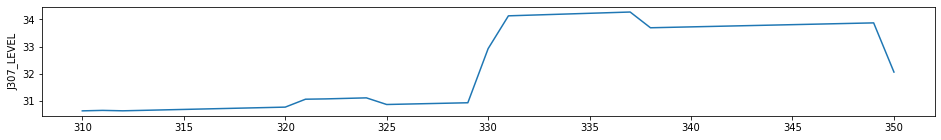

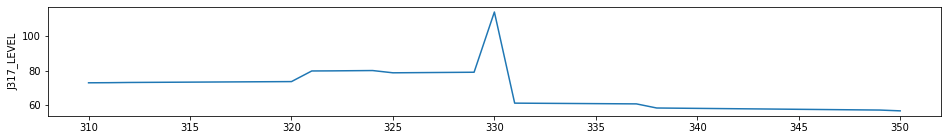

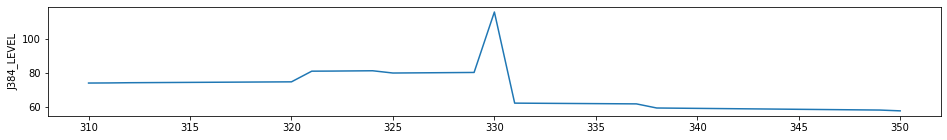

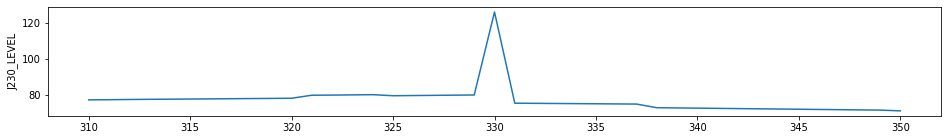

  
 Spike @ Sample 3346 


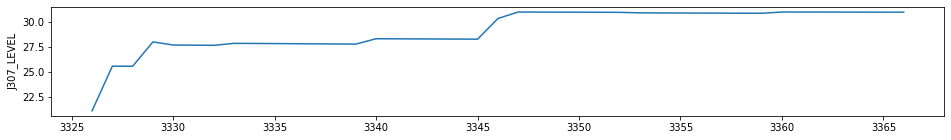

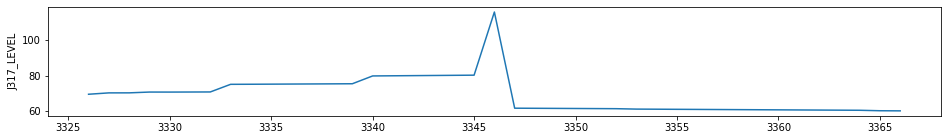

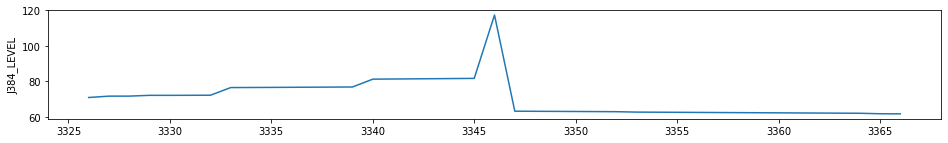

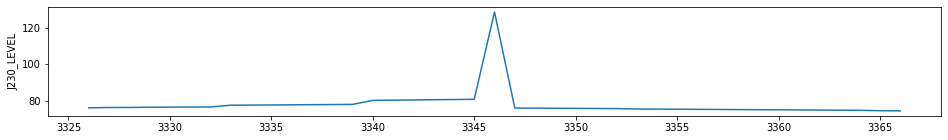

In [21]:
print(color.PURPLE, color.BOLD + "" , color.END)
print(color.PURPLE, color.BOLD + 'Upstream Joint: J307, Dowstream joints: J317, J384, J23', color.END)

select_var = ['J307_LEVEL', 'J317_LEVEL', 'J384_LEVEL', 'J230_LEVEL']
#select_var = ['PU10_STATUS', 'PU10_FLOW', 'J317_LEVEL'] #'J306_LEVEL',
spikes = list(data[data.J317_LEVEL > 85].index)

for sp in spikes[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'Spike @ Sample ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data.loc[sp-20:sp+20,[var]])
        plt.ylabel(var)
        plt.show()

# Pump 8's 1 upstream + 3 downstream nodes

  
 Upstream Joint: J301, Dowstream joints: J306, J87, J70 
  
 Spike @ Sample 143 


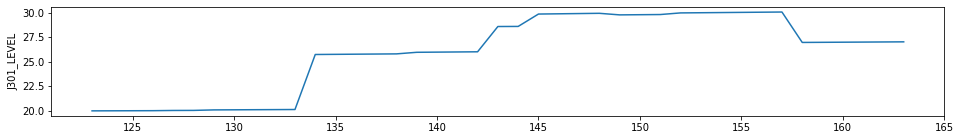

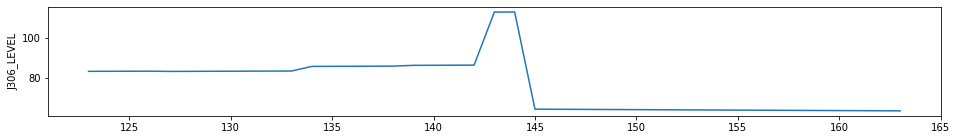

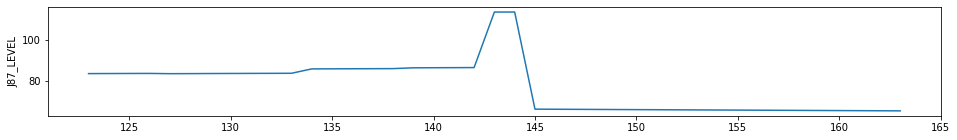

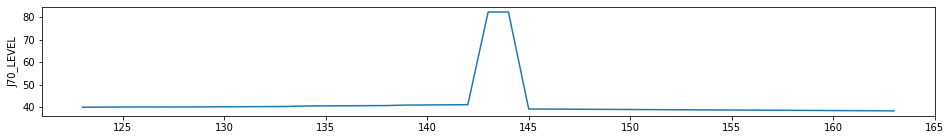

  
 Spike @ Sample 144 


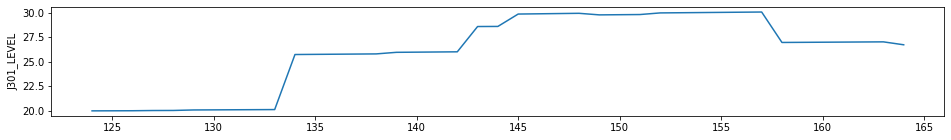

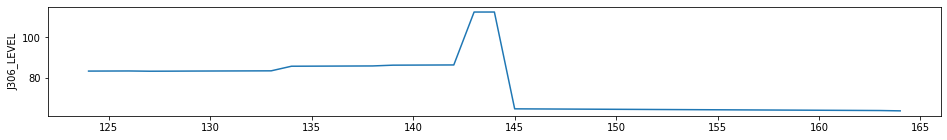

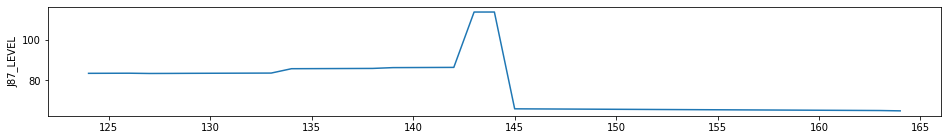

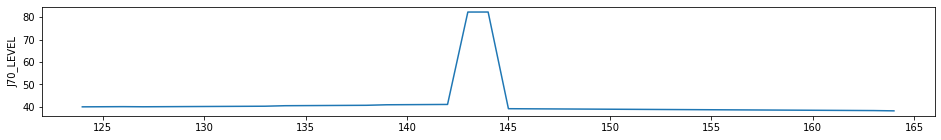

In [22]:
print(color.PURPLE, color.BOLD + "" , color.END)
print(color.PURPLE, color.BOLD + 'Upstream Joint: J301, Dowstream joints: J306, J87, J70', color.END)

select_var = ['J301_LEVEL', 'J306_LEVEL', 'J87_LEVEL', 'J70_LEVEL']
#select_var = ['PU8_STATUS', 'PU8_FLOW', 'J306_LEVEL'] #'J306_LEVEL',
spikes = list(data[data.J306_LEVEL > 100].index)

for sp in spikes[0:2]:
    print(color.PURPLE, color.BOLD + "" , color.END)
    print(color.PURPLE, color.BOLD + 'Spike @ Sample ' + str(sp) , color.END)
    
    for var in (select_var):
        plt.figure(figsize=(16, 2))
        plt.plot(data.loc[sp-20:sp+20,[var]])
        plt.ylabel(var)
        plt.show()